![astropy logo](https://github.com/astropy/astropy-logo/raw/master/generated/astropy_banner_96.png)

# [Python 1](http://kgarofali.github.io/Pre-MAP//docs/Python1.pdf) solutions with `astropy`

[Astropy](http://www.astropy.org/) is an open source collection of tools for astronomers written in Python. One of astropy's most useful features for using Python as a calculator is its units module. This module lets you assign units to variables and understands how they propagate through arithmetic. 

### 5) Schwarzschild radii

**a)** Print the masses:

In [11]:
import numpy as np

# This is how we'll access astropy's units module: 
import astropy.units as u

# astropy stores fundamental physical constants like 
# the mass of the sun M_sun
from astropy.constants import M_sun

masses = u.Quantity([4.31e6*M_sun, 1*M_sun, 1.4*M_sun])
masses

<Quantity [  8.57302100e+36,  1.98910000e+30,  2.78474000e+30] kg>

**b)** Retrieve constants from astropy's [`constants` module](http://docs.astropy.org/en/stable/constants/)

In [23]:
# Newton's gravitational constant G, 
# speed of light c, radius of sun R_sun
from astropy.constants import c, G, R_sun

# Convert the masses to units of grams using the `to` method
masses.to(u.gram)

<Quantity [  8.57302100e+39,  1.98910000e+33,  2.78474000e+33] g>

**c)** Compute $r_s$, convert to cm

In [20]:
r_s = 2*G*masses/c**2
print "r_s in centimeters: {0}".format(r_s.to(u.cm))

r_s in centimeters: [  1.27320480e+12   2.95407147e+05   4.13570005e+05] cm


**d)** $r_s$ in units of solar radii:

In [19]:
print "r_s in solar radii: {0}".format(r_s/R_sun)

r_s in solar radii: [  1.83061130e+01   4.24735800e-06   5.94630120e-06]


**e)** $r_s$ in units of AU

In [25]:
print "r_s in AU: {0}".format(r_s.to(u.AU))

r_s in AU: [  8.51084842e-02   1.97467481e-08   2.76454473e-08] AU


**f)** Compare $r_s$ of Sag A* to orbits of solar system planets:

Any planets interior to r_s?: False


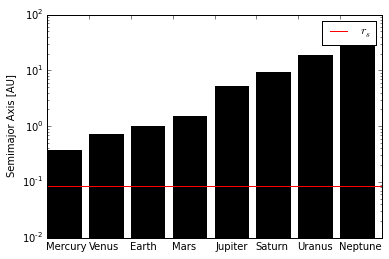

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
semimajor_axes = u.Quantity([0.38, 0.72, 1, 1.5, 5.2, 9.5, 19.1, 30.0], unit=u.AU)

print "Any planets interior to r_s?: {0}".format(any(r_s[0] > semimajor_axes))

fig, ax = plt.subplots()
ax.bar(range(len(semimajor_axes)), semimajor_axes.to(u.AU).value, 
       log=True, color='k')
ax.set_xticklabels(planet_names, ha='left')
ax.axhline(r_s[0].to(u.AU).value, color='r', label='$r_s$')
ax.legend()
ax.set_ylabel('Semimajor Axis [AU]');

**g)** How much bigger is neutron star radius than $r_s$?

In [73]:
radius_neutron_star = 10*u.km
print("how much bigger is neutron star's radius?: {0:.2f}x bigger"
      .format(float(radius_neutron_star/r_s[2])))

how much bigger is neutron star's radius?: 2.42x bigger


### 6) Planets

**a)** Semimajor axes in cm:

In [47]:
planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']
semimajor_axes = u.Quantity([0.38, 0.72, 1, 1.5, 5.2, 9.5, 19.1, 30.0, 40], unit=u.AU)
semimajor_axes.to(u.cm)

<Quantity [  5.68471909e+12,  1.07710467e+13,  1.49597871e+13,
             2.24396806e+13,  7.77908928e+13,  1.42117977e+14,
             2.85731933e+14,  4.48793612e+14,  5.98391483e+14] cm>

**b-c)** Orbital period, in years

Use numpy's `np.pi` variable to get a high-precision value for $\pi$

In [64]:
T = (4 * np.pi**2 * semimajor_axes**3 / (G*M_sun))**0.5
T.to(u.year)

<Quantity [  2.34219587e-01,  6.10866853e-01,  9.99879848e-01,
             1.83689657e+00,  1.18563997e+01,  2.92774483e+01,
             8.34637448e+01,  1.64297024e+02,  2.52951816e+02] yr>

**d)** Light travel time in hours, given

$$\Delta t = \frac{\Delta x}{c}$$

In [65]:
(semimajor_axes/c).to(u.hour)

<Quantity [ 0.05267273, 0.09980096, 0.13861244, 0.20791866, 0.72078469,
            1.31681818, 2.6474976 , 4.1583732 , 5.5444976 ] h>